**Logistic Regression for Clickbait Detection in ClickbaitTR**

---

In [0]:
!git clone -v https://github.com/ahmetax/kalbur.git 

Cloning into 'kalbur'...
POST git-upload-pack (165 bytes)
remote: Enumerating objects: 205, done.
remote: Total 205 (delta 0), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (205/205), 1.24 MiB | 7.72 MiB/s, done.
Resolving deltas: 100% (106/106), done.


In [0]:
import preprocessing as pr
import sys

pr.current_path = "/content/"

with open(pr.current_path + 'kalbur/kelime_bol.py', 'r') as file :
  filedata = file.read()

filedata = filedata.replace('veri/', pr.current_path + "kalbur/veri/")

with open(pr.current_path + 'kalbur/kelime_bol.py', 'w') as file:
  file.write(filedata)

sys.path.append(pr.current_path + "kalbur/")

import kelime_bol as kb

In [0]:
no_of_samples = 1000 # toy example

csv_files = {"limon":"dataset/limon_clickbait.csv",
             "evrensel":"dataset/evrensel_non-clickbait.csv",
             "spoiler":"dataset/spoiler_clickbait.csv",
             "diken":"dataset/diken_non-clickbait.csv"}

clickbait, non_clickbait = pr.return_data(csv_files)

special_characters = ["#", "?", "!", "q.", "@"]

words_will_be_removed = ["işçi", "eylem", "meteoroloji", "katliam", 
                          "murat", "altı", "seçim", "diren", "dev", 
                          "gazze", "blog", "protesto", "beş", 
                          "yaşam", "manşet", "günaydın", "türkiye", 
                          "sınır","chp", "grev", "yaralı", "ateşkes", "yazı", "maden", "bayi"]

X_train, Y_train, X_test, Y_test, unique_word_list = pr.generatesample(clickbait[:no_of_samples], non_clickbait[:no_of_samples], 
                                                                   special_characters, words_will_be_removed, 
                                                                   isseparate=False, scaling=True)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def metrics(lor, X_train, y_train, X_test, y_test):
    cf = classification_report(y_test, lor.predict(X_test))
    test_accuracy = accuracy_score(y_test, lor.predict(X_test))
    training_accuracy = accuracy_score(y_train, lor.predict(X_train))

    lor.fit(X_train, y_train)

    return cf, test_accuracy, training_accuracy

def logreg(X_train, Y_train):
    lor = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
          fit_intercept=True, intercept_scaling=1, class_weight=None, 
          random_state=None, solver='lbfgs', max_iter=100, multi_class='ovr', 
          verbose=1, warm_start=False, n_jobs=None, l1_ratio=None)

    lor.fit(X_train, Y_train)

    return lor

In [0]:
lor = logreg(X_train, Y_train)
cf, test_accuracy, training_accuracy = metrics(lor, X_train, Y_train, X_test, Y_test)
print(cf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       195
         1.0       0.88      0.80      0.84       205

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


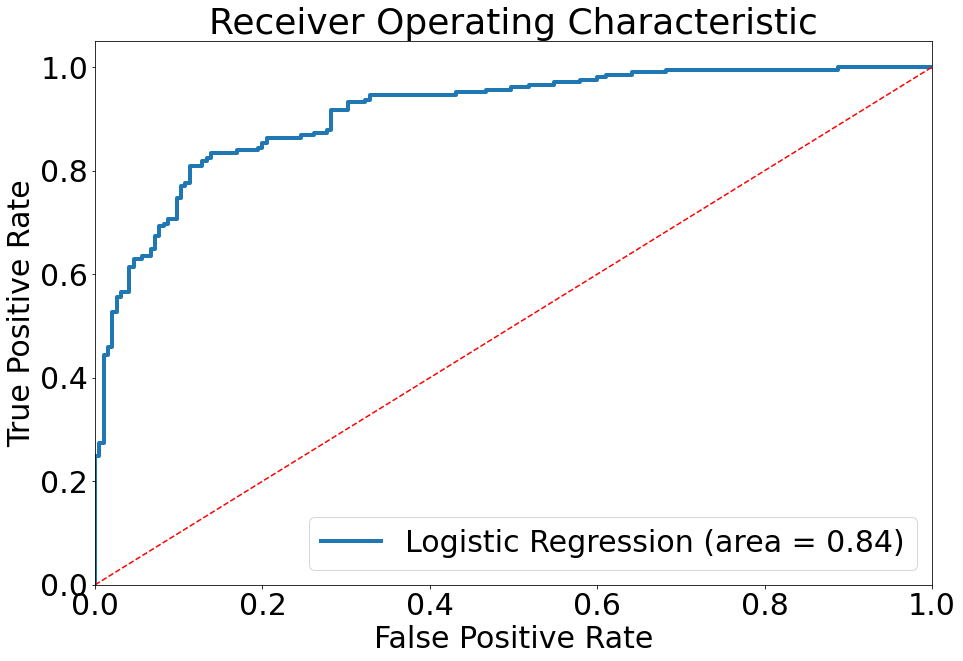

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(Y_test, lor.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lor.predict_proba(X_test)[:,1])
csfont = {'fontname':'Arial'}
plt.figure(figsize=(15, 10))
plt.rcParams['font.size'] = 30
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, linewidth=4.0)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")